In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

C:\Users\PRATIK KALE\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
IMAGE_SIZE =256
BATCH_SIZE =32
CHANNELS =3
EPOCHS = 25

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "data",
    shuffle =True,
    image_size =(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names =dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 2 0 0 0 1 1 1]


In [7]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch[0].numpy())
    


[[[159. 151. 162.]
  [160. 152. 163.]
  [160. 152. 163.]
  ...
  [145. 137. 150.]
  [143. 135. 148.]
  [142. 134. 147.]]

 [[161. 153. 164.]
  [161. 153. 164.]
  [161. 153. 164.]
  ...
  [143. 135. 148.]
  [144. 136. 149.]
  [144. 136. 149.]]

 [[160. 152. 163.]
  [160. 152. 163.]
  [159. 151. 162.]
  ...
  [139. 131. 144.]
  [142. 134. 147.]
  [145. 137. 150.]]

 ...

 [[155. 147. 158.]
  [153. 145. 156.]
  [152. 144. 155.]
  ...
  [119. 109. 120.]
  [118. 108. 119.]
  [118. 108. 119.]]

 [[155. 149. 159.]
  [152. 146. 156.]
  [151. 145. 155.]
  ...
  [121. 111. 122.]
  [122. 112. 123.]
  [123. 113. 124.]]

 [[155. 149. 159.]
  [152. 146. 156.]
  [150. 144. 154.]
  ...
  [126. 116. 127.]
  [128. 118. 129.]
  [131. 121. 132.]]]


In [8]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch[0].shape)


(256, 256, 3)


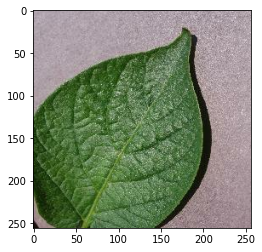

In [9]:
for image_batch , label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))

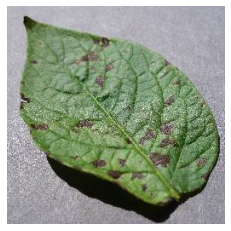

In [10]:
for image_batch , label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.axis('off')

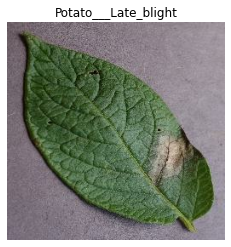

In [11]:
for image_batch , label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])
    plt.axis('off')

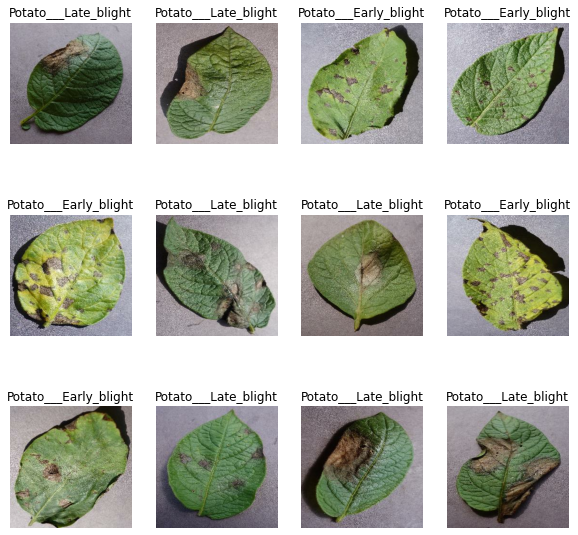

In [12]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range(12):
        ax =plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [13]:
len(dataset)

68

80% ==> training
20% ==> 10% validation, 10% test

In [14]:
train_size =0.8
len(dataset)*train_size

54.400000000000006

In [15]:
train_ds =dataset.take(54)
len(train_ds)

54

In [16]:
test_ds =dataset.skip(54)
len(test_ds)

14

In [17]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [18]:
val_ds =test_ds.take(6)
len(val_ds)

6

In [19]:
test_ds =test_ds.skip(6)
len(test_ds)

8

In [20]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split =0.1,test_split=0.1,shuffle=True,shuffle_size =10000):
    
    ds_size =len(ds)
    
    if shuffle:
        ds =ds.shuffle(shuffle_size,seed =12)
    
    train_size =int(train_split *ds_size)
    val_size =int(val_split *ds_size)
    
    train_ds =ds.take(train_size)
    
    val_ds =ds.skip(train_size).take(val_size)
    test_ds =ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [21]:
train_ds,val_ds,test_ds  = get_dataset_partitions_tf(dataset)

In [22]:
len(train_ds)

54

In [23]:
len(val_ds)

6

In [24]:
len(test_ds)

8

In [25]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size =tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size =tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size =tf.data.AUTOTUNE)

In [26]:
resize_and_rescale =tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [27]:
data_augmentation =tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [28]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)


In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [30]:
model.compile(
    optimizer  ='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits =False),
    metrics=['accuracy']
)

In [31]:
history =model.fit(
    train_ds,
    epochs =EPOCHS,
    batch_size =BATCH_SIZE,
    verbose=1,
    validation_data=val_ds)

Epoch 1/25


54/54 [==============================] - 54s 859ms/step - loss: 0.8873 - accuracy: 0.4919 - val_loss: 0.7734 - val_accuracy: 0.6094
Epoch 2/25
54/54 [==============================] - 50s 934ms/step - loss: 0.6332 - accuracy: 0.7182 - val_loss: 0.4812 - val_accuracy: 0.7812
Epoch 3/25
54/54 [==============================] - 48s 888ms/step - loss: 0.4855 - accuracy: 0.7969 - val_loss: 0.4057 - val_accuracy: 0.8281
Epoch 4/25
54/54 [==============================] - 38s 697ms/step - loss: 0.3242 - accuracy: 0.8704 - val_loss: 0.2203 - val_accuracy: 0.9167
Epoch 5/25
54/54 [==============================] - 44s 826ms/step - loss: 0.2621 - accuracy: 0.8958 - val_loss: 0.1341 - val_accuracy: 0.9479
Epoch 6/25
54/54 [==============================] - 50s 923ms/step - loss: 0.1738 - accuracy: 0.9329 - val_loss: 0.0894 - val_accuracy: 0.9688
Epoch 7/25
54/54 [==============================] - 48s 895ms/step - loss: 0.1496 - accuracy: 0.9485 - val_loss: 0.1068 - val_accuracy: 0.96

In [32]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 5s 227ms/step - loss: 0.0434 - accuracy: 0.9922


In [33]:
scores

[0.043378349393606186, 0.9921875]

In [34]:
history

In [35]:
history.params

{'verbose': 1, 'epochs': 25, 'steps': 54}

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
type(history.history['loss'])

list

In [38]:
len(history.history['loss'])

25

In [39]:
history.history['loss'][:5]

[0.8873462677001953,
 0.6332325339317322,
 0.4855402112007141,
 0.32415086030960083,
 0.2621133625507355]

In [40]:
acc =history.history['accuracy']
val_acc =history.history['val_accuracy']

loss =history.history['loss']
val_loss =history.history['val_loss']

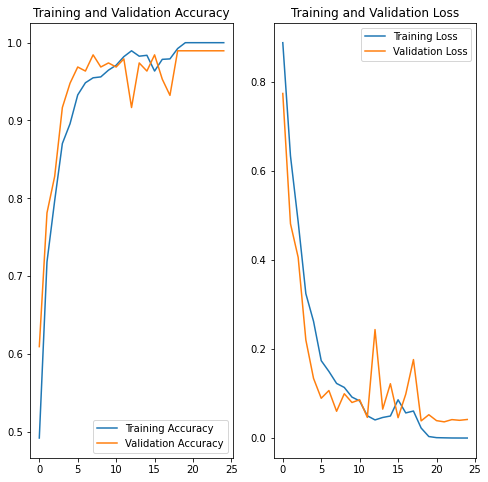

In [42]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc,  label='Validation Accuracy')
plt.legend(loc= 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

frist image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 1s 658ms/step
predicted label:  Potato___Late_blight


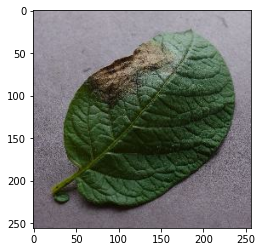

In [44]:
import numpy as np 
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print('frist image to predict')
    plt.imshow(first_image)
    print('actual label:',class_names[first_label])
    
    batch_prediction =model.predict(images_batch)
    print('predicted label: ',class_names[np.argmax(batch_prediction[0])])

In [45]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 30ms/step


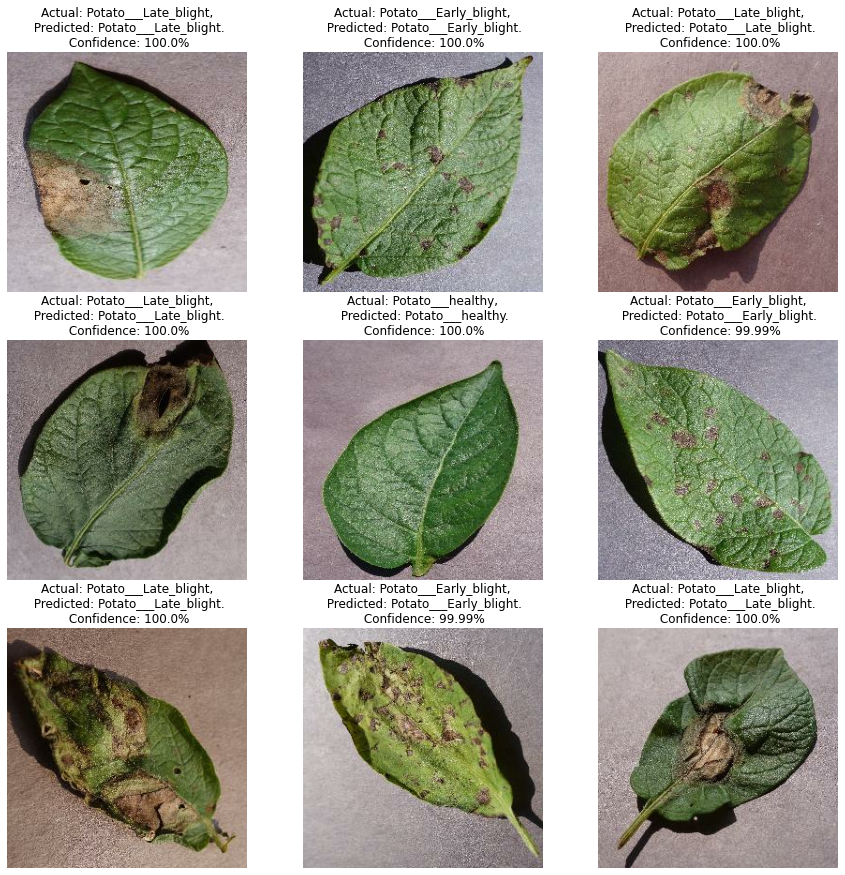

In [46]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [47]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


In [49]:
model.save('../potatoes.h5')